In [7]:
import numpy as np
import pickle, os, torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import models

os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [34]:
Exp = "F2C_1e4-1e5_d"
Exp_desc = "Freezing 2 first Conv Layers - Lr = [1e-4, 1e-5] - dropout"

path = os.path.join("experiments_results", "train_seq",Exp)

with open(os.path.join(path, "ann_logs.pickle"), "rb") as f:
    ann_logs = pickle.load(f)
    
with open(os.path.join(path, "snn_logs.pickle"), "rb") as f:
    snn_logs = pickle.load(f)

print("## {}".format(Exp_desc))
print("|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |")
print("| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |")
print("| ANN | [0-4]  | {:0.2f}% / {:0.2f}%   |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(max(ann_logs["train_acc_1"]),max(ann_logs["test_acc_1"]), ann_logs["test_acc_1"][75], ann_logs["test_acc_1"][79], ann_logs["test_acc_1"][84]))
print("|     | [5-9]  | -                     |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(ann_logs["test_acc_2"][0], ann_logs["test_acc_2"][4], ann_logs["test_acc_2"][9]))
print("| SNN | [0-4]  | {:0.2f}% / {:0.2f}%   |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(max(snn_logs["train_acc_1"]),max(snn_logs["test_acc_1"]), snn_logs["test_acc_1"][75], snn_logs["test_acc_1"][79], snn_logs["test_acc_1"][84]))
print("|     | [5-9]  | -                     |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(snn_logs["test_acc_2"][0], snn_logs["test_acc_2"][4], snn_logs["test_acc_2"][9]))


## Freezing 2 first Conv Layers - Lr = [1e-4, 1e-5] - dropout
|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 99.83% / 99.88%   |99.79% |99.73%  |89.88%   |
|     | [5-9]  | -                     |0.00% |0.00%  |94.71%   |
| SNN | [0-4]  | 99.68% / 99.84%   |99.71% |94.38%  |77.17%   |
|     | [5-9]  | -                     |0.00% |92.41%  |95.66%   |


## Freezing 2 first convs - lr=1e-4 -> 1e-5 - dropout
|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 99.83% / 99.88%   |99.79% |99.73%  |89.88%   |
|     | [5-9]  | -                     |0.00% |0.00%  |94.71%   |
| SNN | [0-4]  | 99.68% / 99.84%   |99.71% |94.38%  |77.17%   |
|     | [5-9]  | -                     |0.00% |92.41%  |95.66%   |

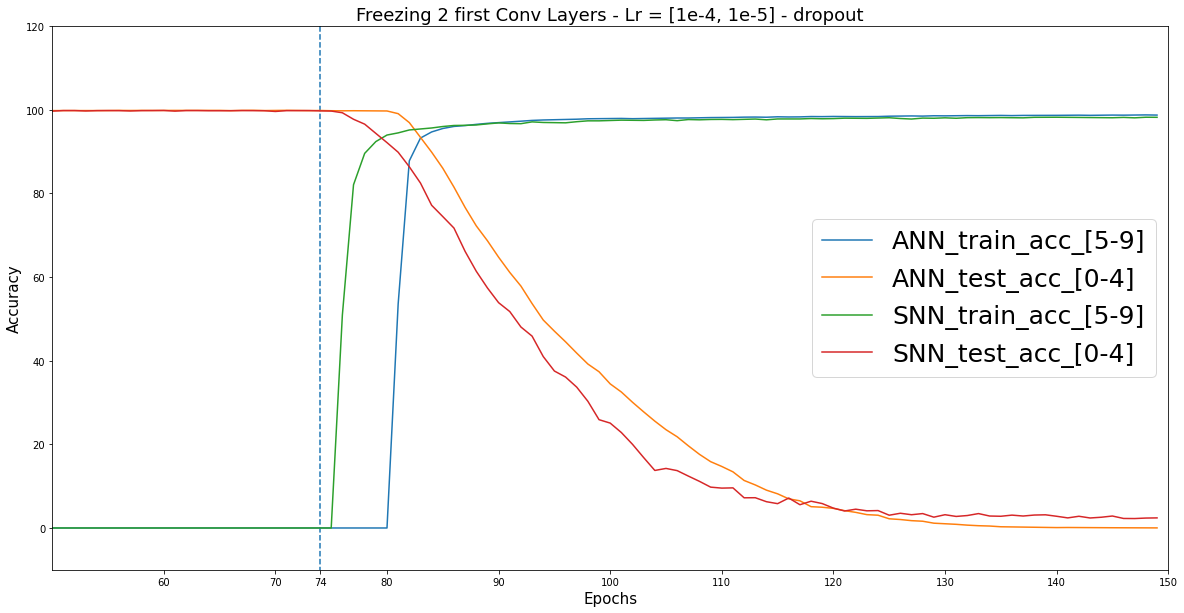

In [35]:
plt.figure(figsize=(20,10))

plt.plot(([0]*75)+ann_logs["test_acc_2"],label="ANN_train_acc_[5-9]")
plt.plot(ann_logs["test_acc_1"], label="ANN_test_acc_[0-4]")

plt.plot(([0]*75)+snn_logs["test_acc_2"], label="SNN_train_acc_[5-9]")
plt.plot(snn_logs["test_acc_1"], label="SNN_test_acc_[0-4]")

plt.legend(fontsize=25)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title(Exp_desc,fontsize=18)
plt.xlim([50,150])
plt.ylim([-10,120])
plt.vlines(74,-100,200,linestyles="dashed")
_ = plt.xticks([74]+[x for x in range(60, 160,10)])

In [36]:
Exp = "F2C_1e3-1e4_d"
Exp_desc = "Freezing 2 first Conv Layers - Lr = [1e-3, 1e-4] - dropout"

path = os.path.join("experiments_results", "train_seq",Exp)

with open(os.path.join(path, "ann_logs.pickle"), "rb") as f:
    ann_logs = pickle.load(f)
    
with open(os.path.join(path, "snn_logs.pickle"), "rb") as f:
    snn_logs = pickle.load(f)

print("## {}".format(Exp_desc))
print("|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |")
print("| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |")
print("| ANN | [0-4]  | {:0.2f}% / {:0.2f}%   |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(max(ann_logs["train_acc_1"]),max(ann_logs["test_acc_1"]), ann_logs["test_acc_1"][75], ann_logs["test_acc_1"][79], ann_logs["test_acc_1"][84]))
print("|     | [5-9]  | -                     |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(ann_logs["test_acc_2"][0], ann_logs["test_acc_2"][4], ann_logs["test_acc_2"][9]))
print("| SNN | [0-4]  | {:0.2f}% / {:0.2f}%   |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(max(snn_logs["train_acc_1"]),max(snn_logs["test_acc_1"]), snn_logs["test_acc_1"][75], snn_logs["test_acc_1"][79], snn_logs["test_acc_1"][84]))
print("|     | [5-9]  | -                     |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(snn_logs["test_acc_2"][0], snn_logs["test_acc_2"][4], snn_logs["test_acc_2"][9]))


## Freezing 2 first Conv Layers - Lr = [1e-3, 1e-4] - dropout
|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 99.92% / 99.92%   |99.90% |91.24%  |65.77%   |
|     | [5-9]  | -                     |0.00% |79.92%  |98.72%   |
| SNN | [0-4]  | 99.90% / 99.92%   |98.75% |83.05%  |61.24%   |
|     | [5-9]  | -                     |80.95% |98.05%  |98.62%   |


## Freezing 2 first Conv Layers - Lr = [1e-3, 1e-4] - dropout
|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 99.92% / 99.92%   |99.90% |91.24%  |65.77%   |
|     | [5-9]  | -                     |0.00% |79.92%  |98.72%   |
| SNN | [0-4]  | 99.90% / 99.92%   |98.75% |83.05%  |61.24%   |
|     | [5-9]  | -                     |80.95% |98.05%  |98.62%   |

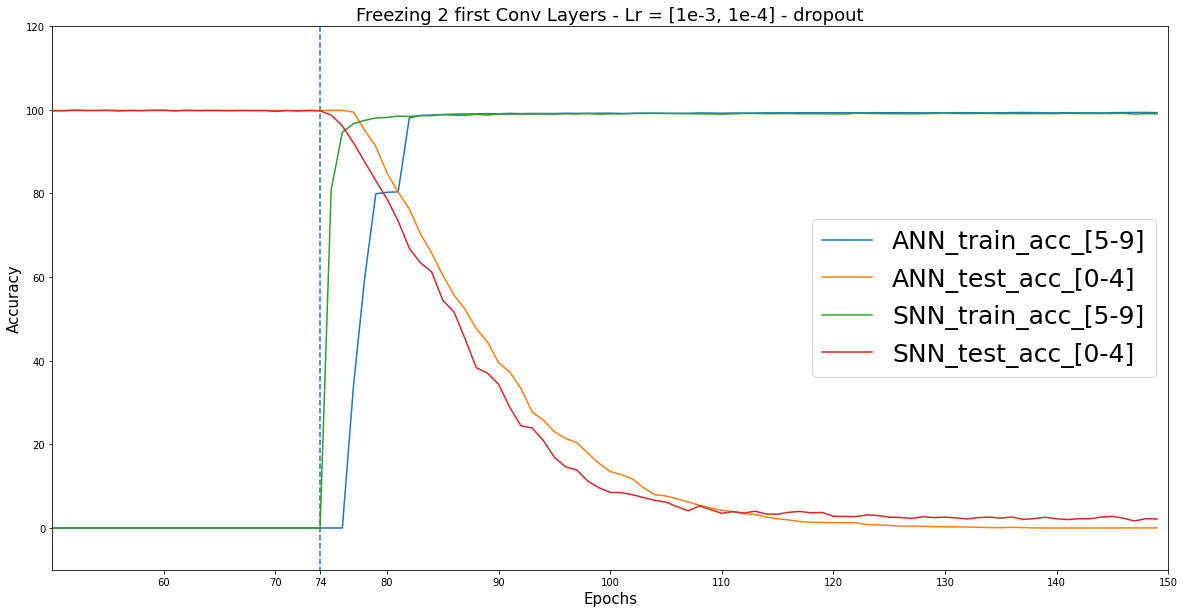

In [37]:
plt.figure(figsize=(20,10))

plt.plot(([0]*75)+ann_logs["test_acc_2"],label="ANN_train_acc_[5-9]")
plt.plot(ann_logs["test_acc_1"], label="ANN_test_acc_[0-4]")

plt.plot(([0]*75)+snn_logs["test_acc_2"], label="SNN_train_acc_[5-9]")
plt.plot(snn_logs["test_acc_1"], label="SNN_test_acc_[0-4]")

plt.legend(fontsize=25)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title(Exp_desc,fontsize=18)
plt.xlim([50,150])
plt.ylim([-10,120])
plt.vlines(74,-100,200,linestyles="dashed")
_ = plt.xticks([74]+[x for x in range(60, 160,10)])

In [38]:
Exp = "F1C_1e3-1e4_d"
Exp_desc = "Freezing 1 first Conv Layer - Lr = [1e-3, 1e-4] - dropout"

path = os.path.join("experiments_results", "train_seq",Exp)

with open(os.path.join(path, "ann_logs.pickle"), "rb") as f:
    ann_logs = pickle.load(f)
    
with open(os.path.join(path, "snn_logs.pickle"), "rb") as f:
    snn_logs = pickle.load(f)

print("## {}".format(Exp_desc))
print("|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |")
print("| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |")
print("| ANN | [0-4]  | {:0.2f}% / {:0.2f}%   |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(max(ann_logs["train_acc_1"]),max(ann_logs["test_acc_1"]), ann_logs["test_acc_1"][75], ann_logs["test_acc_1"][79], ann_logs["test_acc_1"][84]))
print("|     | [5-9]  | -                     |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(ann_logs["test_acc_2"][0], ann_logs["test_acc_2"][4], ann_logs["test_acc_2"][9]))
print("| SNN | [0-4]  | {:0.2f}% / {:0.2f}%   |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(max(snn_logs["train_acc_1"]),max(snn_logs["test_acc_1"]), snn_logs["test_acc_1"][75], snn_logs["test_acc_1"][79], snn_logs["test_acc_1"][84]))
print("|     | [5-9]  | -                     |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(snn_logs["test_acc_2"][0], snn_logs["test_acc_2"][4], snn_logs["test_acc_2"][9]))


## Freezing 1 first Conv Layer - Lr = [1e-3, 1e-4] - dropout
|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 99.92% / 99.92%   |99.86% |81.05%  |55.61%   |
|     | [5-9]  | -                     |0.00% |98.37%  |98.97%   |
| SNN | [0-4]  | 99.90% / 99.92%   |97.18% |62.11%  |32.77%   |
|     | [5-9]  | -                     |93.42% |98.60%  |99.03%   |


## Freezing 1 first Conv Layer - Lr = [1e-3, 1e-4] - dropout
|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 99.92% / 99.92%   |99.86% |81.05%  |55.61%   |
|     | [5-9]  | -                     |0.00% |98.37%  |98.97%   |
| SNN | [0-4]  | 99.90% / 99.92%   |97.18% |62.11%  |32.77%   |
|     | [5-9]  | -                     |93.42% |98.60%  |99.03%   |

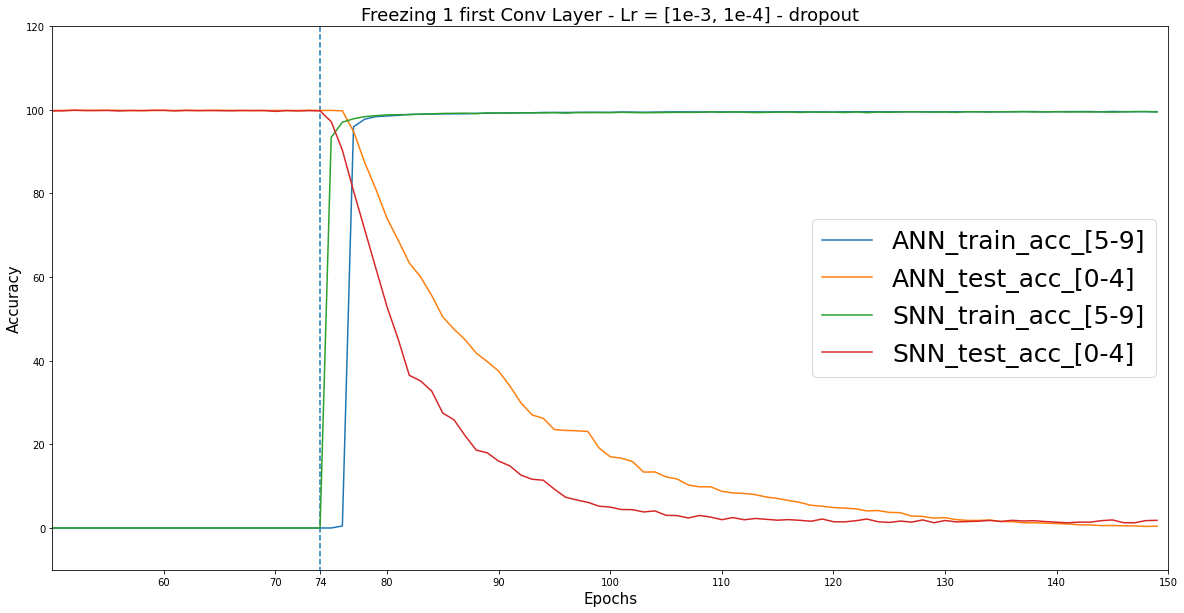

In [39]:
plt.figure(figsize=(20,10))

plt.plot(([0]*75)+ann_logs["test_acc_2"],label="ANN_train_acc_[5-9]")
plt.plot(ann_logs["test_acc_1"], label="ANN_test_acc_[0-4]")

plt.plot(([0]*75)+snn_logs["test_acc_2"], label="SNN_train_acc_[5-9]")
plt.plot(snn_logs["test_acc_1"], label="SNN_test_acc_[0-4]")

plt.legend(fontsize=25)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title(Exp_desc,fontsize=18)
plt.xlim([50,150])
plt.ylim([-10,120])
plt.vlines(74,-100,200,linestyles="dashed")
_ = plt.xticks([74]+[x for x in range(60, 160,10)])

In [42]:
Exp = "F2C_1e3-1e4_no-d"
Exp_desc = "Freezing 1 first Conv Layer - Lr = [1e-3, 1e-4] - no dropout"

path = os.path.join("experiments_results", "train_seq",Exp)

with open(os.path.join(path, "ann_logs.pickle"), "rb") as f:
    ann_logs = pickle.load(f)
    
with open(os.path.join(path, "snn_logs.pickle"), "rb") as f:
    snn_logs = pickle.load(f)

print("## {}".format(Exp_desc))
print("|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |")
print("| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |")
print("| ANN | [0-4]  | {:0.2f}% / {:0.2f}%   |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(max(ann_logs["train_acc_1"]),max(ann_logs["test_acc_1"]), ann_logs["test_acc_1"][75], ann_logs["test_acc_1"][79], ann_logs["test_acc_1"][84]))
print("|     | [5-9]  | -                     |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(ann_logs["test_acc_2"][0], ann_logs["test_acc_2"][4], ann_logs["test_acc_2"][9]))
print("| SNN | [0-4]  | {:0.2f}% / {:0.2f}%   |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(max(snn_logs["train_acc_1"]),max(snn_logs["test_acc_1"]), snn_logs["test_acc_1"][75], snn_logs["test_acc_1"][79], snn_logs["test_acc_1"][84]))
print("|     | [5-9]  | -                     |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(snn_logs["test_acc_2"][0], snn_logs["test_acc_2"][4], snn_logs["test_acc_2"][9]))


## Freezing 1 first Conv Layer - Lr = [1e-3, 1e-4] - no dropout
|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 100.00% / 99.90%   |94.55% |72.85%  |55.58%   |
|     | [5-9]  | -                     |94.08% |98.93%  |99.20%   |
| SNN | [0-4]  | 100.00% / 99.92%   |96.65% |71.92%  |52.62%   |
|     | [5-9]  | -                     |91.36% |98.17%  |98.70%   |


## Freezing 1 first Conv Layer - Lr = [1e-3, 1e-4] - no dropout
|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 100.00% / 99.90%   |94.55% |72.85%  |55.58%   |
|     | [5-9]  | -                     |94.08% |98.93%  |99.20%   |
| SNN | [0-4]  | 100.00% / 99.92%   |96.65% |71.92%  |52.62%   |
|     | [5-9]  | -                     |91.36% |98.17%  |98.70%   |

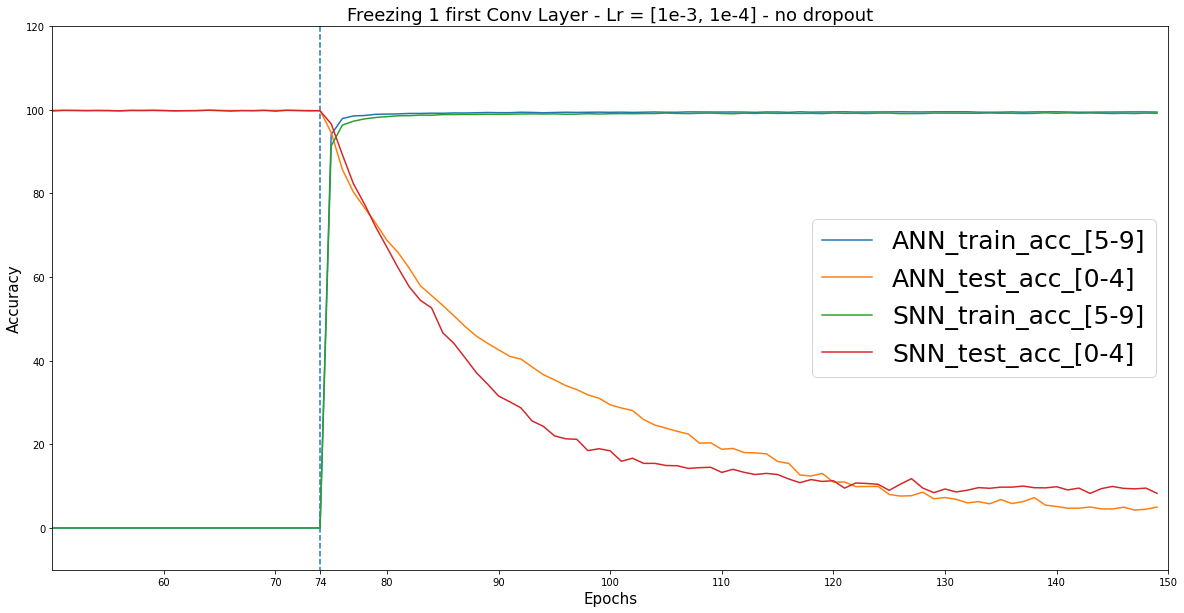

In [43]:
plt.figure(figsize=(20,10))

plt.plot(([0]*75)+ann_logs["test_acc_2"],label="ANN_train_acc_[5-9]")
plt.plot(ann_logs["test_acc_1"], label="ANN_test_acc_[0-4]")

plt.plot(([0]*75)+snn_logs["test_acc_2"], label="SNN_train_acc_[5-9]")
plt.plot(snn_logs["test_acc_1"], label="SNN_test_acc_[0-4]")

plt.legend(fontsize=25)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title(Exp_desc,fontsize=18)
plt.xlim([50,150])
plt.ylim([-10,120])
plt.vlines(74,-100,200,linestyles="dashed")
_ = plt.xticks([74]+[x for x in range(60, 160,10)])

In [5]:
Exp = "F2C_1e3-1e4_d_res-det"
Exp_desc = "Freezing 2 first Conv Layers - Lr = [1e-3, 1e-4] - dropout - detach_reset"

path = os.path.join("experiments_results", "train_seq",Exp)

with open(os.path.join(path, "ann_logs.pickle"), "rb") as f:
    ann_logs = pickle.load(f)
    
with open(os.path.join(path, "snn_logs.pickle"), "rb") as f:
    snn_logs = pickle.load(f)

print("## {}".format(Exp_desc))
print("|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |")
print("| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |")
print("| ANN | [0-4]  | {:0.2f}% / {:0.2f}%   |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(max(ann_logs["train_acc_1"]),max(ann_logs["test_acc_1"]), ann_logs["test_acc_1"][75], ann_logs["test_acc_1"][79], ann_logs["test_acc_1"][84]))
print("|     | [5-9]  | -                     |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(ann_logs["test_acc_2"][0], ann_logs["test_acc_2"][4], ann_logs["test_acc_2"][9]))
print("| SNN | [0-4]  | {:0.2f}% / {:0.2f}%   |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(max(snn_logs["train_acc_1"]),max(snn_logs["test_acc_1"]), snn_logs["test_acc_1"][75], snn_logs["test_acc_1"][79], snn_logs["test_acc_1"][84]))
print("|     | [5-9]  | -                     |{:0.2f}% |{:0.2f}%  |{:0.2f}%   |".format(snn_logs["test_acc_2"][0], snn_logs["test_acc_2"][4], snn_logs["test_acc_2"][9]))


## Freezing 2 first Conv Layers - Lr = [1e-3, 1e-4] - dropout - detach_reset
|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 99.92% / 99.92%   |99.90% |91.24%  |65.77%   |
|     | [5-9]  | -                     |0.00% |79.92%  |98.72%   |
| SNN | [0-4]  | 99.89% / 99.92%   |99.01% |83.67%  |55.48%   |
|     | [5-9]  | -                     |81.20% |98.07%  |98.54%   |


## Freezing 2 first Conv Layers - Lr = [1e-3, 1e-4] - dropout - detach_reset
|     | Labels | Pre-training on [0-4] | 1 Epoch | 5 Epochs | 10 Epochs |
| :-: | :----: | :-------------------: | :-----: | :------: | :-------: |
| ANN | [0-4]  | 99.92% / 99.92%   |99.90% |91.24%  |65.77%   |
|     | [5-9]  | -                     |0.00% |79.92%  |98.72%   |
| SNN | [0-4]  | 99.89% / 99.92%   |99.01% |83.67%  |55.48%   |
|     | [5-9]  | -                     |81.20% |98.07%  |98.54%   |

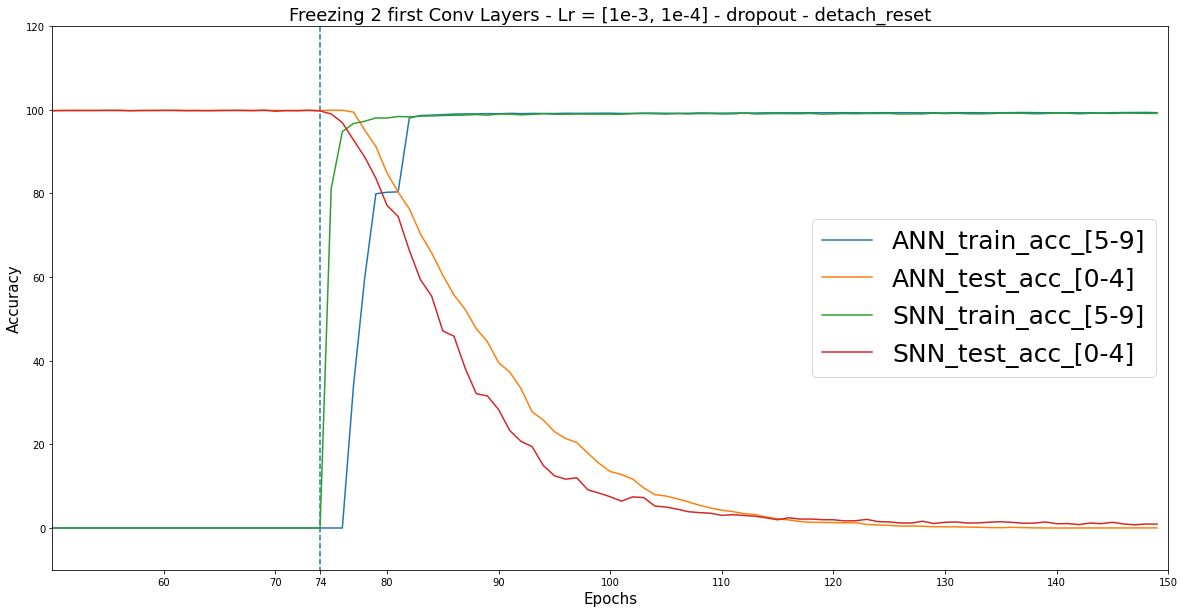

In [6]:
plt.figure(figsize=(20,10))

plt.plot(([0]*75)+ann_logs["test_acc_2"],label="ANN_train_acc_[5-9]")
plt.plot(ann_logs["test_acc_1"], label="ANN_test_acc_[0-4]")

plt.plot(([0]*75)+snn_logs["test_acc_2"], label="SNN_train_acc_[5-9]")
plt.plot(snn_logs["test_acc_1"], label="SNN_test_acc_[0-4]")

plt.legend(fontsize=25)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title(Exp_desc,fontsize=18)
plt.xlim([50,150])
plt.ylim([-10,120])
plt.vlines(74,-100,200,linestyles="dashed")
_ = plt.xticks([74]+[x for x in range(60, 160,10)])

In [3]:
Exp_nod = "F2C_1e3-1e4_no-d"
Exp_d = "F2C_1e3-1e4_d"

path_d = os.path.join("experiments_results", "train_seq", Exp_d)
path_nod = os.path.join("experiments_results", "train_seq", Exp_nod)

with open(os.path.join(path_d, "ann_logs.pickle"), "rb") as f:
    ann_logs_d = pickle.load(f)
    
with open(os.path.join(path_d, "snn_logs.pickle"), "rb") as f:
    snn_logs_d = pickle.load(f)

with open(os.path.join(path_nod, "ann_logs.pickle"), "rb") as f:
    ann_logs_nod = pickle.load(f)
    
with open(os.path.join(path_nod, "snn_logs.pickle"), "rb") as f:
    snn_logs_nod = pickle.load(f)


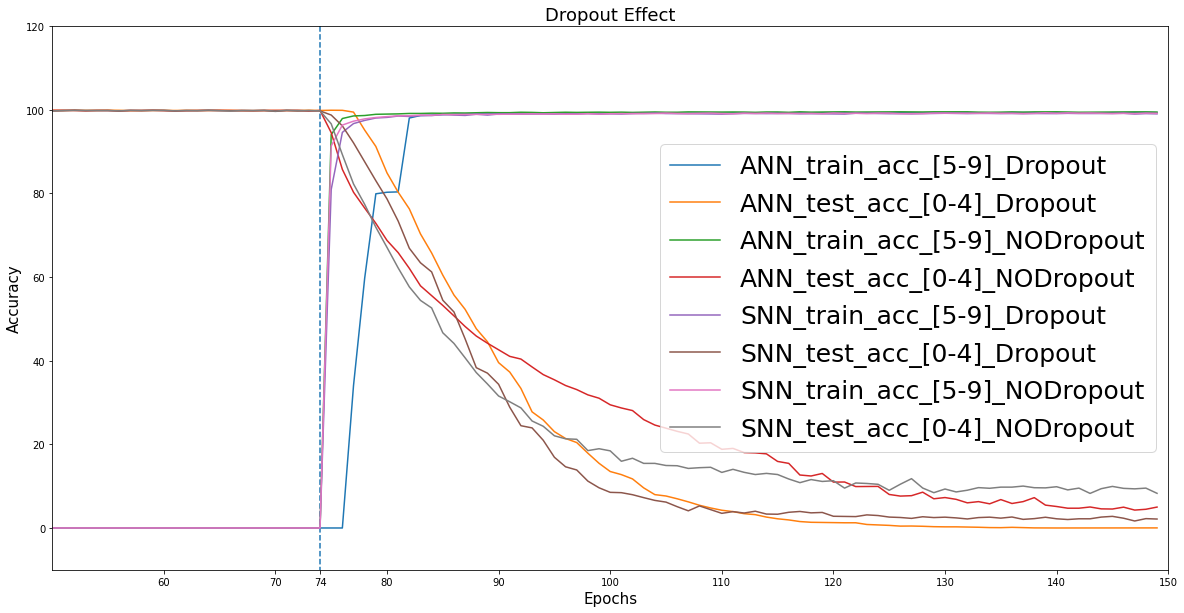

In [8]:
plt.figure(figsize=(20,10))


plt.plot(([0]*75)+ann_logs_d["test_acc_2"],label="ANN_train_acc_[5-9]_Dropout")
plt.plot(ann_logs_d["test_acc_1"], label="ANN_test_acc_[0-4]_Dropout")

plt.plot(([0]*75)+ann_logs_nod["test_acc_2"],label="ANN_train_acc_[5-9]_NODropout")
plt.plot(ann_logs_nod["test_acc_1"], label="ANN_test_acc_[0-4]_NODropout")


plt.plot(([0]*75)+snn_logs_d["test_acc_2"], label="SNN_train_acc_[5-9]_Dropout")
plt.plot(snn_logs_d["test_acc_1"], label="SNN_test_acc_[0-4]_Dropout")

plt.plot(([0]*75)+snn_logs_nod["test_acc_2"], label="SNN_train_acc_[5-9]_NODropout")
plt.plot(snn_logs_nod["test_acc_1"], label="SNN_test_acc_[0-4]_NODropout")


plt.legend(fontsize=25)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Dropout Effect",fontsize=18)
plt.xlim([50,150])
plt.ylim([-10,120])
plt.vlines(74,-100,200,linestyles="dashed")
_ = plt.xticks([74]+[x for x in range(60, 160,10)])